# Sentiment Analysis of Social Media Content
## Data Science BootCamp Project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setup cell - Run this first
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Now import from src
from src import load_data, clean_data, map_sentiments

print("✓ Setup complete!")

✓ Setup complete!


In [3]:
# Load and clean data
df = load_data('../Data/sentimentdataset.csv')
df_clean = clean_data(df)

Dataset loaded successfully with shape: (732, 15)
Dropped 2 unnamed columns: ['Unnamed: 0.1', 'Unnamed: 0']
Starting data cleaning pipeline...
Cleaned 'Platform' column - unique values: 3
Cleaned 'Sentiment' column - unique values: 191
Cleaned 'Country' column - unique values: 33
Found and removed 21 duplicate rows.
New shape: (711, 13)

=== Missing Values ===
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

=== Duplicates ===
Found 0 duplicate rows.

=== Timestamp Validation ===
Timestamp column successfully converted to datetime.

=== Text Validation ===
Found 0 posts with no text.

=== Sentiment Mapping Results ===
Sentiment_Group
Joy              409
Neutral/Other    117
Sadness           83
Anger             59
Fear              25
Guilt             18
Name: count, dtype: int64

=== Cleaning Complete ===
Final shape: (711, 

In [4]:
# Check data validity
print(df_clean.describe())

                           Timestamp    Retweets       Likes         Year  \
count                            711  711.000000  711.000000   711.000000   
mean   2020-12-12 07:37:38.227848192   21.533052   42.949367  2020.482419   
min              2010-05-15 15:30:00    5.000000   10.000000  2010.000000   
25%              2019-03-05 17:20:00   17.500000   34.500000  2019.000000   
50%              2021-10-22 18:30:00   22.000000   43.000000  2021.000000   
75%              2023-02-27 16:32:30   25.000000   50.000000  2023.000000   
max              2023-10-22 20:45:00   40.000000   80.000000  2023.000000   
std                              NaN    7.125729   14.218822     2.825321   

            Month         Day        Hour  
count  711.000000  711.000000  711.000000  
mean     6.101266   15.514768   15.599156  
min      1.000000    1.000000    0.000000  
25%      3.000000   10.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   22.000000   19.000000 

## Exploratory data analysis (EDA):

First, let's get an idea of the basic landscape of the dataset:

In [5]:
df_clean['Sentiment'].unique().shape

(191,)

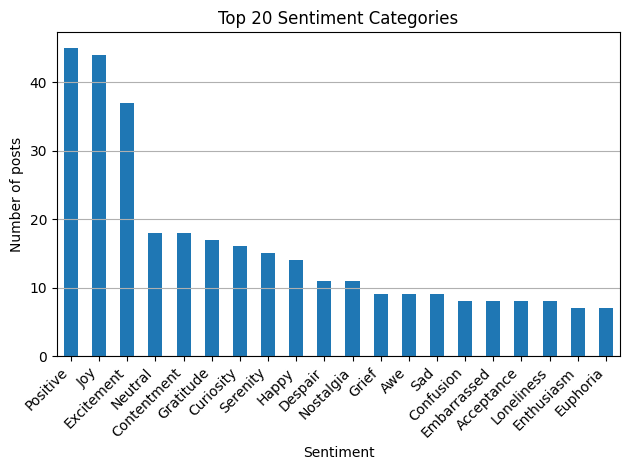

In [6]:
Sentiment_counts = df_clean['Sentiment'].value_counts()

n = 20  # Top n sentiment categories

plt.figure()
Sentiment_counts[:n].plot(kind='bar')
plt.ylabel('Number of posts')
plt.title(f"Top {n} Sentiment Categories")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Too many sentiments, perhaps we need to categorize and map them into 6 groups:

In [7]:
# Mapping sentiment categories to broader groups
# Check the result
print(df_clean['Sentiment_Group'].value_counts())
df_clean.shape

Sentiment_Group
Joy              409
Neutral/Other    117
Sadness           83
Anger             59
Fear              25
Guilt             18
Name: count, dtype: int64


(711, 15)

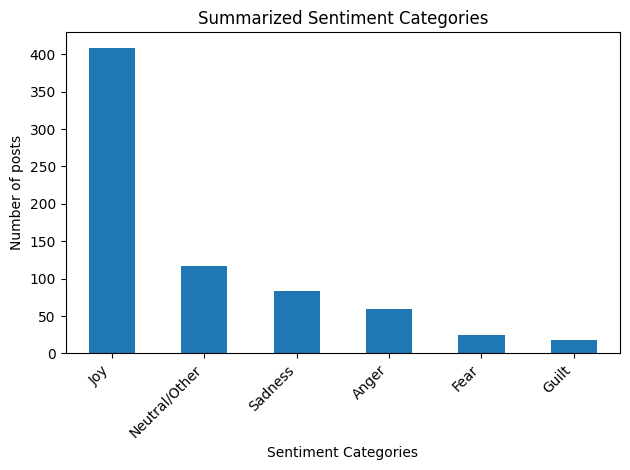

In [8]:
Sentiment_counts = df_clean['Sentiment_Group'].value_counts()

plt.figure()
Sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of posts')
plt.title(f"Summarized Sentiment Categories")
plt.xticks(rotation=45, ha='right')
# plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

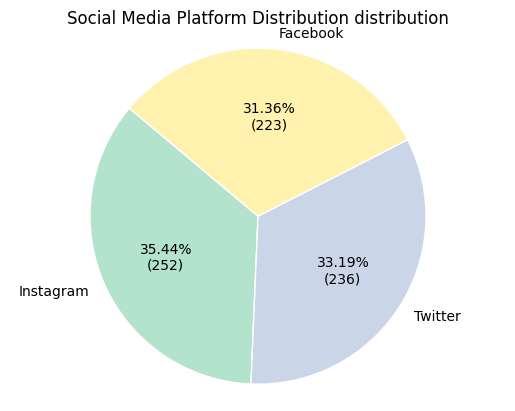

In [9]:
# Social Media Platform Distribution
platform_counts = df_clean['Platform'].value_counts()
colors = plt.get_cmap("Pastel2")(np.linspace(0, 0.65, len(platform_counts)))

total = platform_counts.sum()
plt.pie(
    platform_counts.values,
    labels=platform_counts.index.astype(str),
    colors=colors,
    startangle=140,
    wedgeprops=dict(edgecolor="white", linewidth=1),
    autopct=lambda p: f"{p:.2f}%\n({int(round(p*total/100))})"
)
plt.axis("equal")
plt.title("Social Media Platform Distribution distribution")
plt.show()


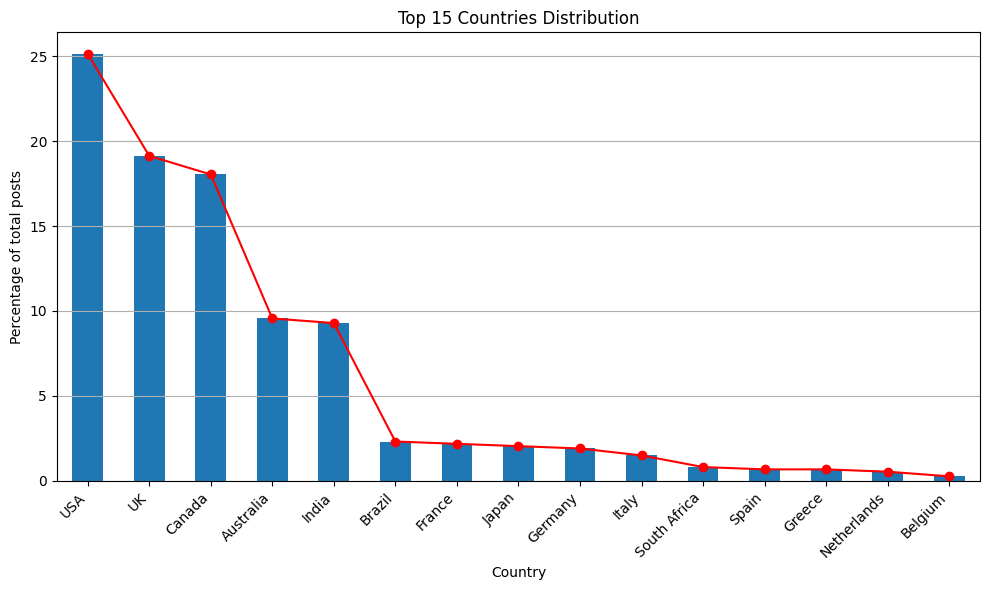

In [10]:
Country_counts = df_clean['Country'].value_counts()/(df['Country'].value_counts().sum())*100

n = 15  # Top n sentiment categories

plt.figure(figsize=(10,6))
Country_counts[:n].plot(kind='bar')
hold = Country_counts[:n].plot(kind='line', color='red', marker='o')
plt.ylabel('Percentage of total posts')
plt.title(f"Top {n} Countries Distribution")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

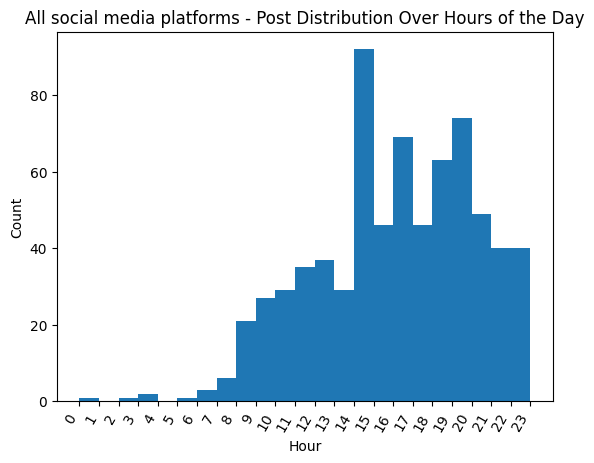

In [11]:
# Visualizing the distribution of posts over hours of the day
Hour_counts = df_clean['Hour'].value_counts().reindex(range(24), fill_value=0)
# Hour_counts.plot(kind='bar')
# hold = Hour_counts.plot(kind='line', color='red', marker='o')
plt.hist(df_clean['Hour'], bins=np.arange(0, 24, 1), density=False)  # centers on integers 0..23
plt.xticks(range(24),rotation=60, ha='right')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('All social media platforms - Post Distribution Over Hours of the Day')
plt.show()

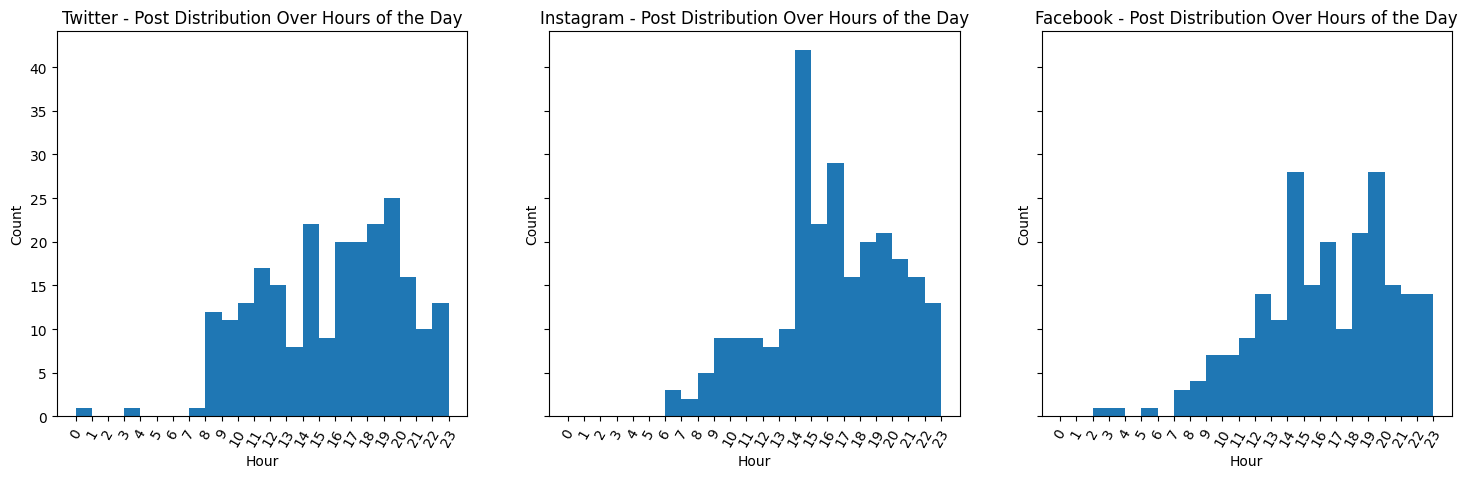

In [12]:
# Over different platforms
platforms = df_clean['Platform'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
axes = axes.flatten()
for ax, platform in zip(axes, platforms):
    platform_data = df_clean[df_clean['Platform'] == platform]
    ax.hist(platform_data['Hour'], bins=np.arange(0, 24, 1), density=False)
    ax.set_xticks(range(24))
    ax.tick_params(axis='x', rotation=60)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')
    ax.set_title(f'{platform} - Post Distribution Over Hours of the Day')
#plt.show()

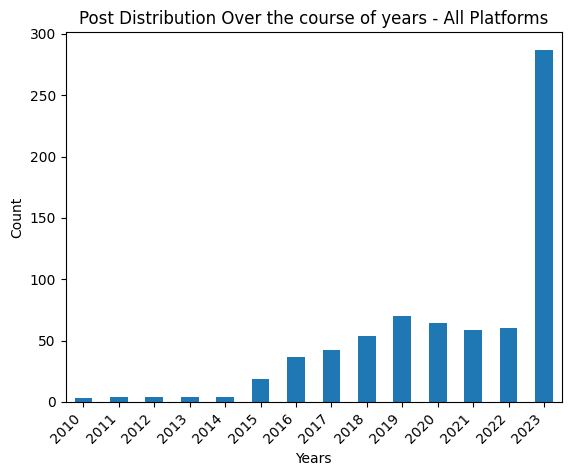

In [13]:
# Visualizing the distribution of posts over years
year_counts = df_clean['Year'].value_counts().reindex(range(2010,2024,1), fill_value=0)
year_counts.plot(kind='bar')
plt.xticks(range(14),rotation=45, ha='right')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Post Distribution Over the course of years - All Platforms')
plt.show()

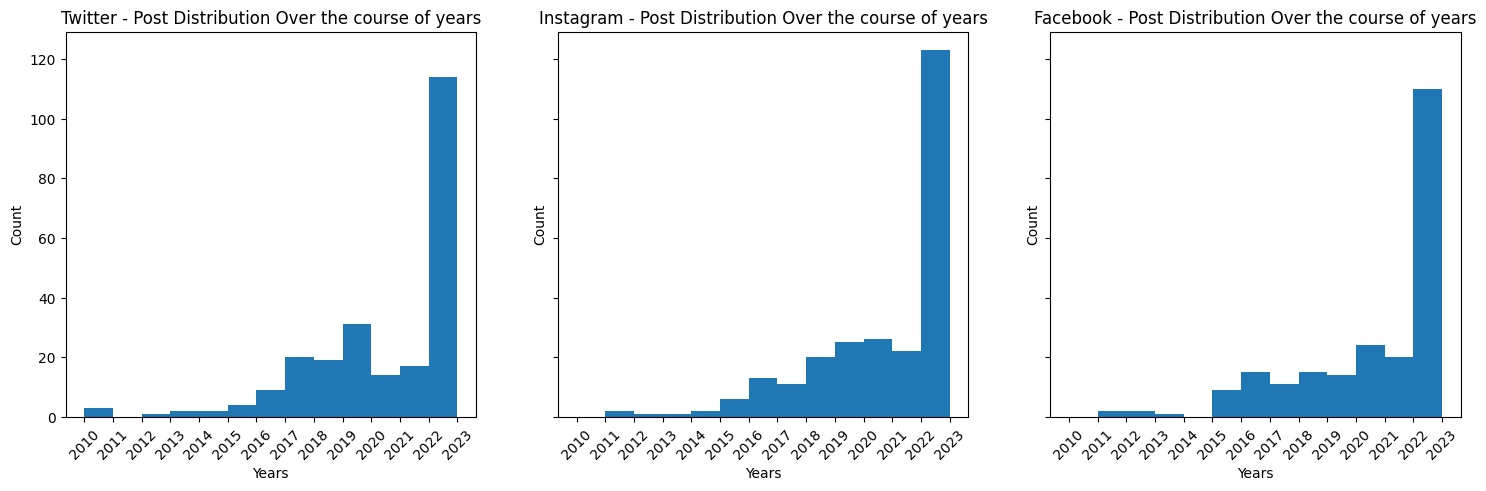

In [14]:
# Over different platforms
platforms = df_clean['Platform'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
axes = axes.flatten()
for ax, platform in zip(axes, platforms):
    platform_data = df_clean[df_clean['Platform'] == platform]
    ax.hist(platform_data['Year'], bins=np.arange(2010, 2024, 1), density=False)
    ax.set_xticks(np.arange(2010, 2024, 1))
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Years')
    ax.set_ylabel('Count')
    ax.set_title(f'{platform} - Post Distribution Over the course of years')
#plt.show()

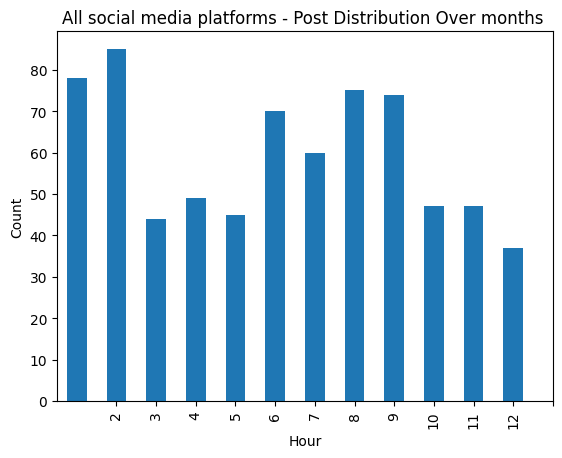

In [15]:
# Visualizing the distribution of posts over months
month_counts = df_clean['Month'].value_counts().reindex(range(1,13), fill_value=0)
month_counts.plot(kind='bar')
plt.xticks(range(1,13))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('All social media platforms - Post Distribution Over months ')
plt.show()

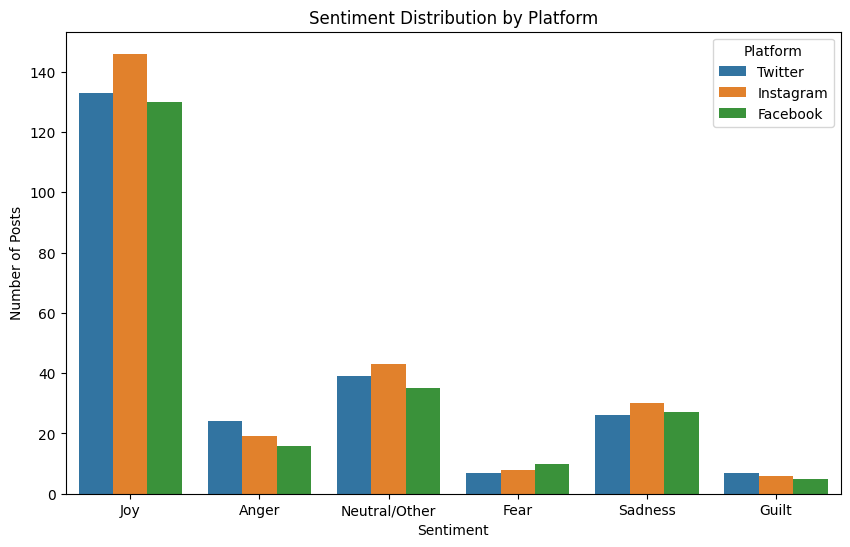

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Sentiment_Group', hue='Platform')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.legend(title='Platform')
plt.show()

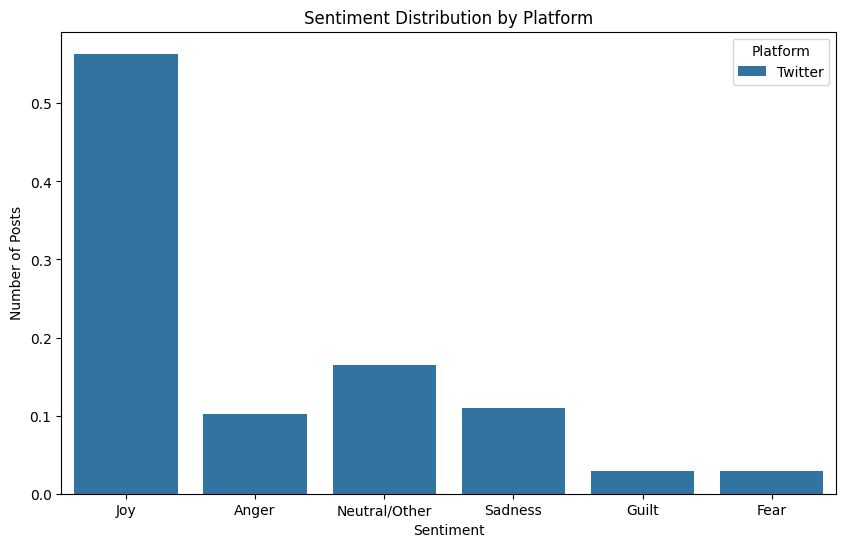

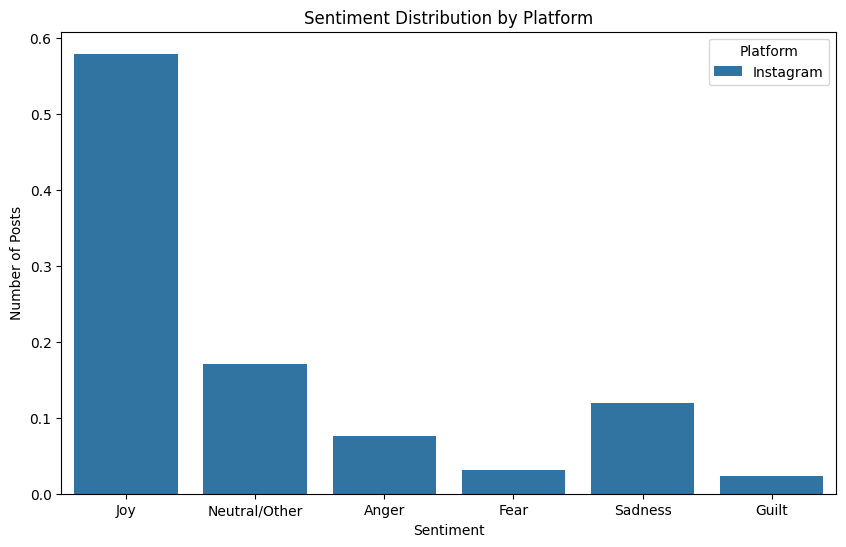

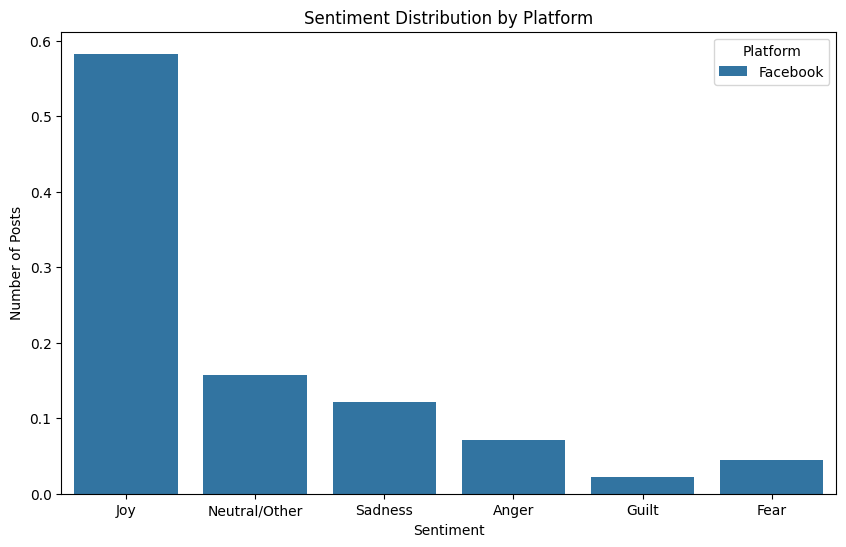

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean[df_clean['Platform']=='Twitter'], x='Sentiment_Group', hue='Platform', stat='probability')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.legend(title='Platform')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean[df_clean['Platform']=='Instagram'], x='Sentiment_Group', hue='Platform', stat='probability')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.legend(title='Platform')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean[df_clean['Platform']=='Facebook'], x='Sentiment_Group', hue='Platform', stat='probability')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.legend(title='Platform')
plt.show()

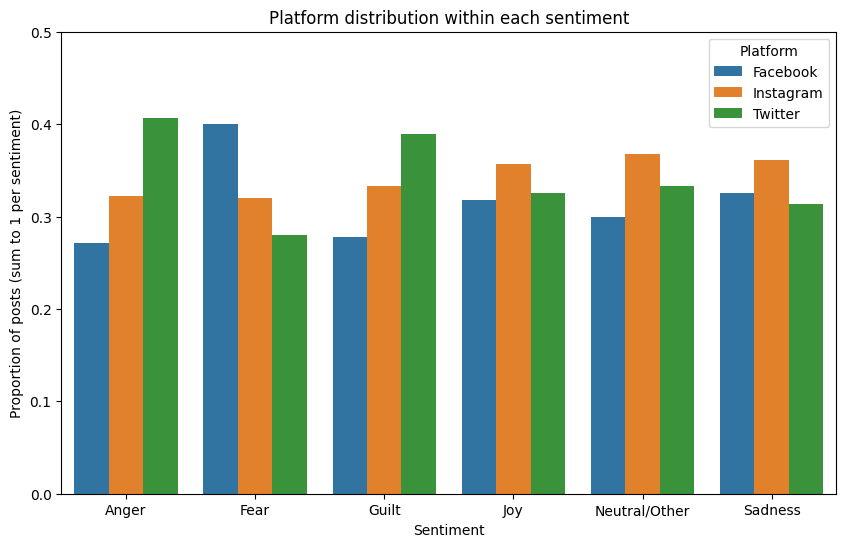

In [96]:
counts = (
    df_clean
    .groupby(['Sentiment_Group', 'Platform'])
    .size()
    .reset_index(name='count')
)

# Normalize within each Sentiment_Group so bars per sentiment sum to 1
counts['prop'] = counts.groupby('Sentiment_Group')['count'].transform(
    lambda x: x / x.sum()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=counts,
    x='Sentiment_Group',
    y='prop',
    hue='Platform'
)
plt.title('Platform distribution within each sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Proportion of posts (sum to 1 per sentiment)')
plt.legend(title='Platform')
plt.ylim(0, 0.5)
plt.show()

In [95]:
print(counts)

   Sentiment_Group   Platform  count      prop
0            Anger   Facebook     16  0.271186
1            Anger  Instagram     19  0.322034
2            Anger    Twitter     24  0.406780
3             Fear   Facebook     10  0.400000
4             Fear  Instagram      8  0.320000
5             Fear    Twitter      7  0.280000
6            Guilt   Facebook      5  0.277778
7            Guilt  Instagram      6  0.333333
8            Guilt    Twitter      7  0.388889
9              Joy   Facebook    130  0.317848
10             Joy  Instagram    146  0.356968
11             Joy    Twitter    133  0.325183
12   Neutral/Other   Facebook     35  0.299145
13   Neutral/Other  Instagram     43  0.367521
14   Neutral/Other    Twitter     39  0.333333
15         Sadness   Facebook     27  0.325301
16         Sadness  Instagram     30  0.361446
17         Sadness    Twitter     26  0.313253


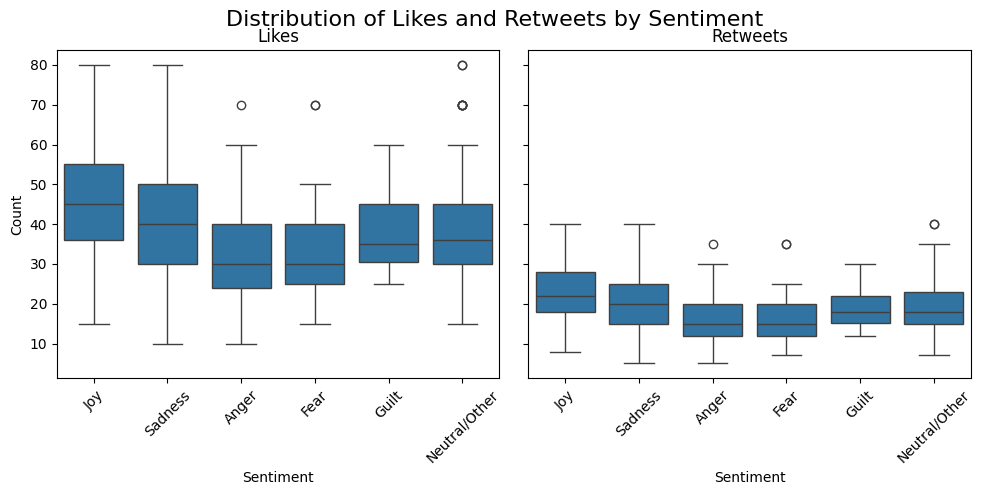

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Distribution of Likes and Retweets by Sentiment', fontsize=16)
# plt.figure(figsize=(6, 4))
sns.boxplot(ax=axes[0],data=df_clean, x='Sentiment_Group', y='Likes',order=['Joy', 'Sadness', 'Anger', 'Fear', 'Guilt', 'Neutral/Other'])
# plt.title('Distribution of Likes by Sentiment')
# plt.xlabel('Sentiment')
# plt.ylabel('Number of Likes')
# plt.tight_layout()
# plt.show()
axes[0].set_title('Likes')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# You can create a similar plot for 'Retweets'
# plt.figure(figsize=(6, 4))
sns.boxplot(ax=axes[1],data=df_clean, x='Sentiment_Group', y='Retweets',order=['Joy', 'Sadness', 'Anger', 'Fear', 'Guilt', 'Neutral/Other'])
# plt.title('Distribution of Retweets by Sentiment')
# plt.xlabel('Sentiment')
# plt.ylabel('Number of Retweets')
# plt.tight_layout()
# plt.show()
axes[1].set_title('Retweets')
axes[1].set_xlabel('Sentiment')
# The y-label is often omitted on the second plot when sharing an axis
axes[1].set_ylabel('')

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

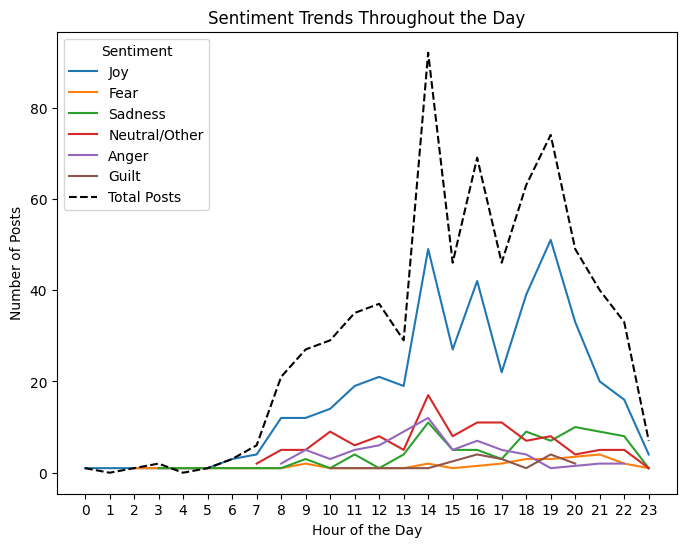

In [19]:
# Group by Hour and Sentiment, then count the occurrences
hourly_sentiment = df_clean.groupby(['Hour', 'Sentiment_Group']).size().reset_index(name='Count')

# total_counts = hourly_sentiment.groupby('Sentiment_Group')['Count'].transform('max')
# hourly_sentiment['Ratio'] = hourly_sentiment['Count'] / total_counts
Hour_counts = df_clean['Hour'].value_counts().reindex(range(24), fill_value=0)
plt.figure(figsize=(8, 6))
sns.lineplot(data=hourly_sentiment, x='Hour', y='Count', hue='Sentiment_Group')
hold = Hour_counts.plot(kind='line', color='black', linestyle='--', label='Total Posts')
plt.title('Sentiment Trends Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(range(0, 24))
plt.legend(title='Sentiment')
plt.show()

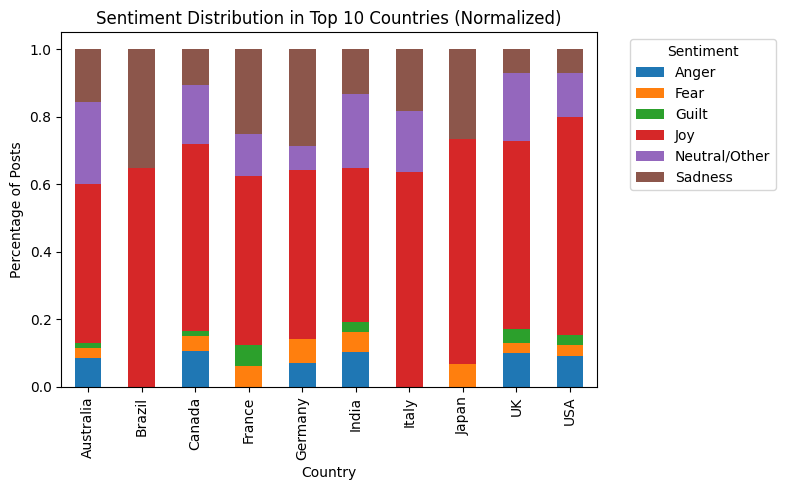

In [20]:
# The top 10 most frequent countries
top_10_countries = df_clean['Country'].value_counts().head(10).index

# Filter the DataFrame
df_top10 = df_clean[df_clean['Country'].isin(top_10_countries)]

# Group by Country and Sentiment, get counts, and calculate percentages
country_sentiment = df_top10.groupby(['Country', 'Sentiment_Group']).size().unstack(fill_value=0)
country_sentiment_percent = country_sentiment.apply(lambda x: x / x.sum(), axis=1)

# Plot the stacked bar chart
country_sentiment_percent.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 5)
)
plt.title('Sentiment Distribution in Top 10 Countries (Normalized)')
plt.xlabel('Country')
plt.ylabel('Percentage of Posts')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

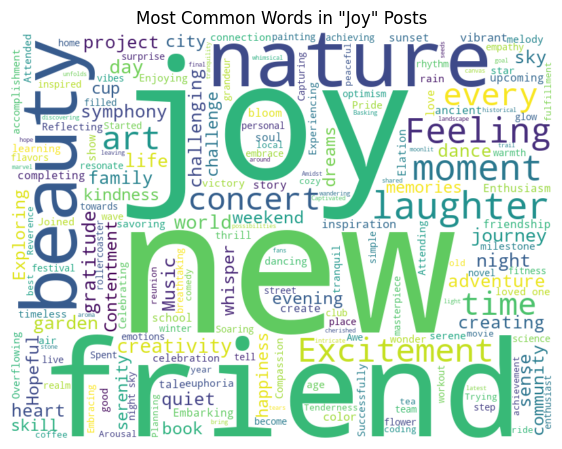

In [21]:
from wordcloud import WordCloud

# Filter text for a specific sentiment
hate_text = " ".join(text for text in df_clean[df_clean['Sentiment_Group'] == 'Joy']['Text'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=600, 
    background_color='white'
).generate(hate_text)

# Display the word cloud
plt.figure(figsize=(7, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the axes
plt.title('Most Common Words in "Joy" Posts')
plt.show()

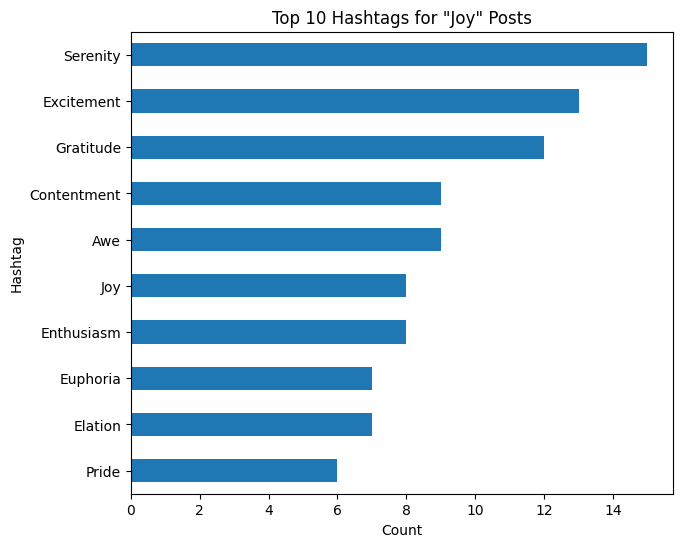

In [22]:
# 1. Filter for a sentiment and drop any missing hashtags
joy_hashtags = df_clean[df_clean['Sentiment_Group'] == 'Joy']['Hashtags'].dropna()

# 2. Split hashtags, 'explode' them into their own rows, and clean them
all_hashtags = (
    joy_hashtags.str.split(r'#')  # Split by '#'
    .explode()                   # Put each hashtag on its own row
    .str.strip()                 # Remove whitespace
)

# 3. Filter out empty strings and get the top 10
top_10_joy_hashtags = all_hashtags[all_hashtags != ''].value_counts().head(10)

# 4. Plot the results
plt.figure(figsize=(7, 6))
top_10_joy_hashtags.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Hashtags for "Joy" Posts')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()

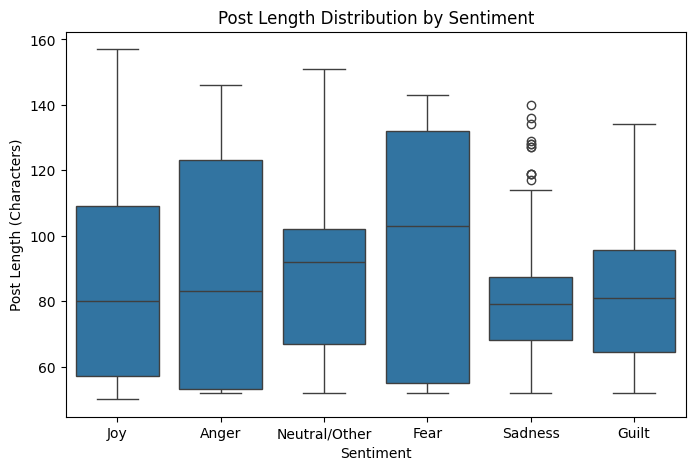

In [23]:
# 1. Create a new column for the length of the 'Text'
df_clean['post_length'] = df_clean['Text'].str.len()

# 2. Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='Sentiment_Group', y='post_length')
plt.title('Post Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Post Length (Characters)')
plt.show()

In [24]:
df_clean.to_csv('../Data/cleaned_sentiment_data.csv', index=False)

## Engineering Higher Level Features

In [25]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

/Users/ye2040/Desktop/DataScience Bootcamp/Sentiment_Analysis_NYUDSFall2025/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
# Combine Text and Hashtags for richer context
#    (Handling missing hashtags by replacing them with empty strings)
df_clean['Full_Text'] = df_clean['Text'] + " " + df_clean['Hashtags'].fillna("")

# Create a vectorizer model that removes stopwords
vectorizer_model = CountVectorizer(stop_words="english")

# Initialize BERTopic (The LLM part)
#    - 'all-MiniLM-L6-v2' is a fast, efficient sentence transformer
topic_model = BERTopic(embedding_model="all-mpnet-base-v2",#"all-MiniLM-L6-v2", #
                       vectorizer_model=vectorizer_model,
                       calculate_probabilities=True, 
                       verbose=True)

# Fit the model and transform the text
print("Extracting topics... this may take a minute.")
topics, probs = topic_model.fit_transform(df_clean['Full_Text'].tolist())

# Get Topic Info and Assign Labels
#    This gives us the top keywords for each topic
topic_info = topic_model.get_topic_info()
print(topic_info.head())

# Map the Topic Names back to your DataFrame
#    -1 is "Outlier/Noise" (topics the model couldn't classify)
df_clean['Topic_ID'] = topics
# Create a custom label like "Topic 1: election, vote, politics"
df_clean['Topic_Keywords'] = df_clean['Topic_ID'].apply(lambda x: topic_model.get_topic(x)[0][0] if x != -1 else "Noise")

# (Optional) Manually Map ID to Human Names
#    After running, look at 'Topic_Keywords' and rename them manually for better presentation
#    topic_map = {0: "Lifestyle", 1: "Politics", 2: "Tech", ...}
#    df['Topic_Label'] = df['Topic_ID'].map(topic_map)

2025-11-30 14:21:45,303 - BERTopic - Embedding - Transforming documents to embeddings.


Extracting topics... this may take a minute.


Batches: 100%|██████████| 23/23 [00:02<00:00,  8.25it/s]
2025-11-30 14:21:49,656 - BERTopic - Embedding - Completed ✓
2025-11-30 14:21:49,656 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-30 14:21:50,372 - BERTopic - Dimensionality - Completed ✓
2025-11-30 14:21:50,373 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-30 14:21:50,404 - BERTopic - Cluster - Completed ✓
2025-11-30 14:21:50,406 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-30 14:21:50,607 - BERTopic - Representation - Completed ✓


   Topic  Count                                         Name  \
0     -1    177          -1_acceptance_enthusiasm_dance_life   
1      0     73            0_despair_grief_loneliness_echoes   
2      1     58                  1_art_school_new_creativity   
3      2     53  2_milestone_fulfillment_challenging_victory   
4      3     34         3_serenity_nature_tranquility_sunset   

                                      Representation  \
0  [acceptance, enthusiasm, dance, life, new, ins...   
1  [despair, grief, loneliness, echoes, shattered...   
2  [art, school, new, creativity, photography, sc...   
3  [milestone, fulfillment, challenging, victory,...   
4  [serenity, nature, tranquility, sunset, tranqu...   

                                 Representative_Docs  
0  [ Embracing life's imperfections, finding acce...  
1  [Torn apart by grief, the echoes of loss rever...  
2  [Joined a nature photography club, capturing t...  
3  [ Pride in completing a challenging fitness ch...  
4  

In [34]:
# Get the counts for each topic
topic_counts = df_clean['Topic_Keywords'].value_counts()

print(topic_counts)

Topic_Keywords
Noise           177
despair          73
art              58
milestone        53
serenity         34
bitterness       33
curiosity        31
concert          30
hopeful          27
bad              24
laughter         19
surprise         17
indifference     17
confusion        17
gratitude        16
book             16
trip             15
cooking          14
kindness         14
nostalgia        14
anxiety          12
Name: count, dtype: int64


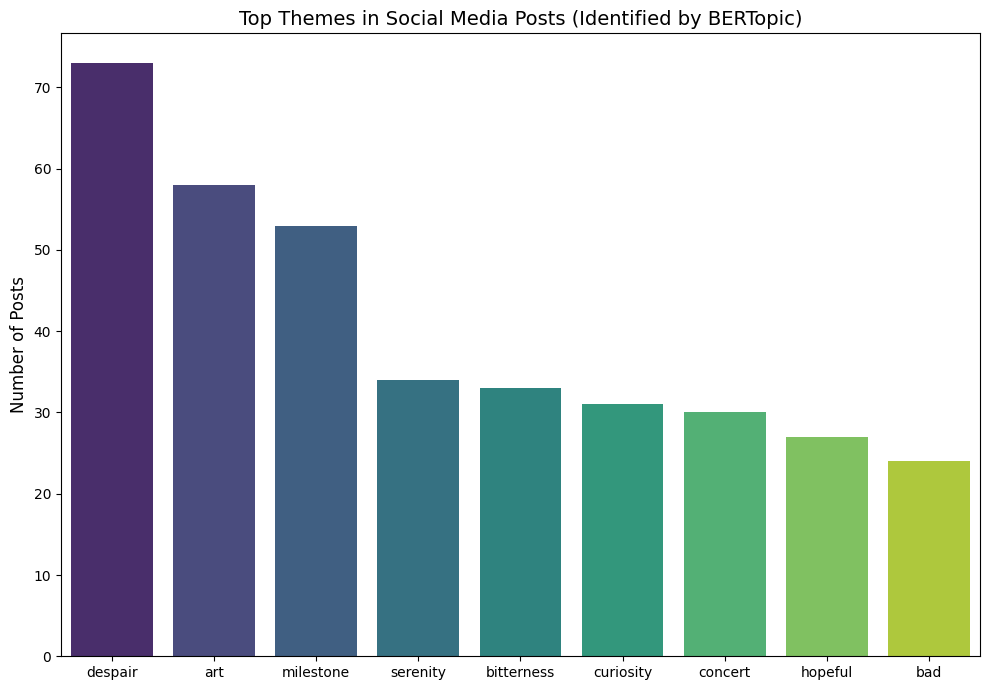

In [93]:
topic_counts = df_clean['Topic_Keywords'].value_counts().head(10).reset_index()
topic_counts.columns = ['Topic', 'Count']

# Remove "Noise" if it dominates the chart (optional)
topic_counts = topic_counts[topic_counts['Topic'] != 'Noise']

# 3. Create a beautiful horizontal bar chart
plt.figure(figsize=(10, 7))
sns.barplot(data=topic_counts, x='Topic', y='Count', palette='viridis')

plt.title('Top Themes in Social Media Posts (Identified by BERTopic)', fontsize=14)
plt.ylabel('Number of Posts', fontsize=12)
plt.xlabel('') # Hide y-label as topic names are self-explanatory
plt.tight_layout()

# 4. Save for your slide
plt.savefig('slide4_top_topics.png', dpi=300)
plt.show()

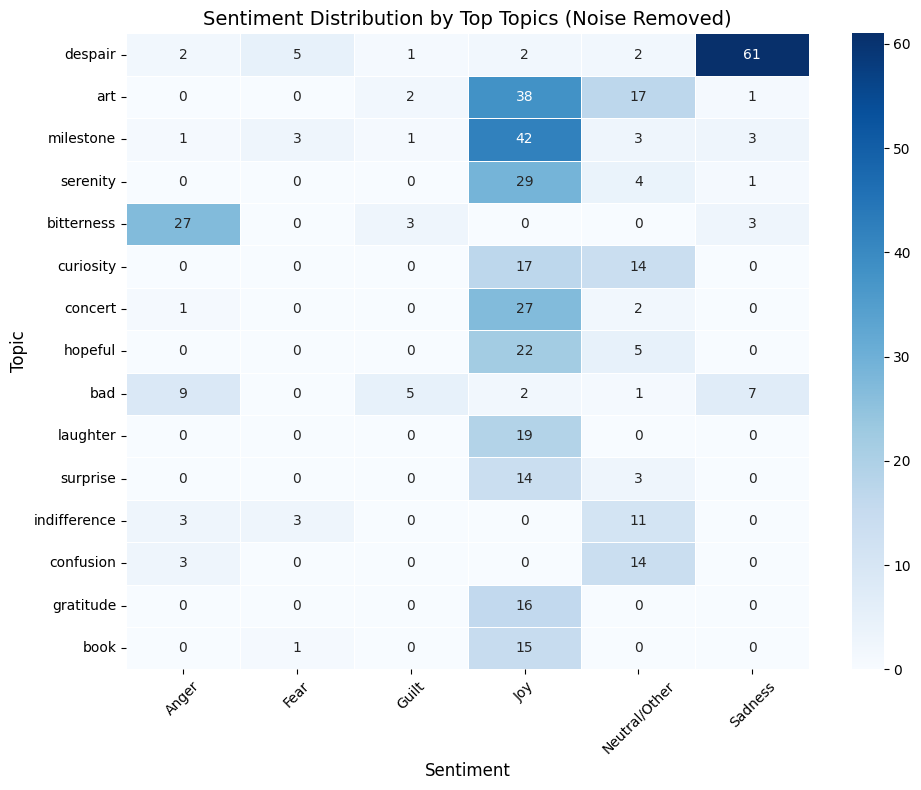

In [36]:
topic_sentiment = pd.crosstab(df_clean['Topic_Keywords'], df_clean['Sentiment_Group'])

# Get a list of Top Topics, but EXCLUDE 'Noise'
#    We sort by frequency, drop 'Noise', and take the top 5-8
top_topics = df_clean['Topic_Keywords'].value_counts()

if 'Noise' in top_topics:
    top_topics = top_topics.drop('Noise')

# Let's take the top 8 valid topics
top_8_topics = top_topics.head(15).index

# Filter the crosstab to show only these top topics
topic_sentiment_clean = topic_sentiment.loc[top_8_topics]

# Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(topic_sentiment_clean, 
            annot=True,    # Show the numbers
            fmt='d',       # Format as integers (not scientific notation)
            cmap='Blues',  # Blue color scheme
            linewidths=.5) # Add grid lines for readability

plt.title('Sentiment Distribution by Top Topics (Noise Removed)', fontsize=14)
plt.ylabel('Topic', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.xticks(rotation=45) # Angle the sentiments for better reading
plt.tight_layout()

# 5. Save and Show
plt.savefig('slide4_topic_sentiment_heatmap_clean.png', dpi=300)
plt.show()

Top 10 Sentiments: ['positive', 'joy', 'excitement', 'neutral', 'contentment', 'gratitude', 'curiosity', 'serenity', 'happy', 'despair']


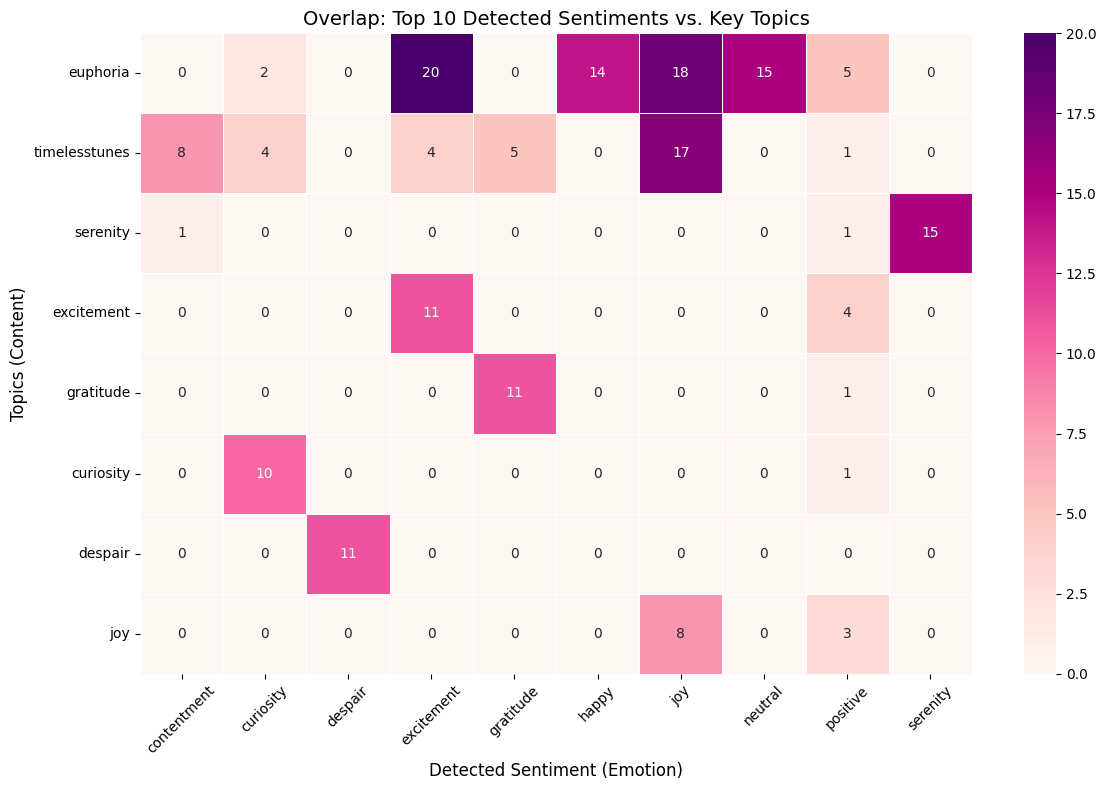

In [30]:
top_10_sentiments = df_clean['Sentiment_Clean'].value_counts().head(10).index
print(f"Top 10 Sentiments: {list(top_10_sentiments)}")

# 3. Filter data to include ONLY these top 10 sentiments
#    AND exclude 'Noise' topics for a clearer view
df_filtered = df_clean[
    (df_clean['Sentiment_Clean'].isin(top_10_sentiments)) & 
    (df_clean['Topic_Keywords'] != 'Noise')
]

# 4. Create the Crosstab (Matrix)
#    Rows = Topics, Columns = Top 10 Sentiments
sentiment_topic_matrix = pd.crosstab(df_filtered['Topic_Keywords'], df_filtered['Sentiment_Clean'])

# 5. Filter to Top 8 Topics (to keep the chart readable)
#    Sort by total volume and pick the top 8
top_topics = sentiment_topic_matrix.sum(axis=1).sort_values(ascending=False).head(8).index
sentiment_topic_matrix = sentiment_topic_matrix.loc[top_topics]

# 6. Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_topic_matrix, 
            annot=True,     # Show counts
            fmt='d',        # Integers
            cmap='RdPu',    # Red-Purple colormap
            linewidths=.5)

plt.title('Overlap: Top 10 Detected Sentiments vs. Key Topics', fontsize=14)
plt.ylabel('Topics (Content)', fontsize=12)
plt.xlabel('Detected Sentiment (Emotion)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
# Create Cyclic Features for Hour
# This maps hours onto a circle so 23 and 0 are close.
df_clean['Hour_Sin'] = np.sin(2 * np.pi * df_clean['Hour'] / 24)
df_clean['Hour_Cos'] = np.cos(2 * np.pi * df_clean['Hour'] / 24)

# Do the same for Month (1-12) to capture seasonality
df_clean['Month_Sin'] = np.sin(2 * np.pi * df_clean['Month'] / 12)
df_clean['Month_Cos'] = np.cos(2 * np.pi * df_clean['Month'] / 12)

In [ ]:
# Avoid division by zero by adding 1
df_clean['Likes_to_Retweets_Ratio'] = df_clean['Likes'] / (df_clean['Retweets'] + 1)

# Hashtag Count (A proxy for "effort" in a post)
df_clean['Hashtag_Count'] = df_clean['Hashtags'].astype(str).apply(lambda x: len(x.split('#')) - 1 if x != 'nan' else 0)

### Statistical Tests

In [46]:
from scipy.stats import chi2_contingency, f_oneway

In [54]:
def run_chi_square_test(df, col1, col2):
    """Performs a Chi-Square test of independence."""
    print(f"--- Chi-Square Test: {col1} vs. {col2} ---")
    
    # 1. Create the contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Check for empty rows/columns (can cause issues) and small cell counts
    if contingency_table.min().min() == 0:
        print("WARNING: Contingency table has zero values. Chi-Square may be unreliable.")
        
    # 2. Run the test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # 3. Print results
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_value:.4f}")
    
    # Interpretation for the presentation
    if p_value < 0.05:
        print("Conclusion: The relationship is STATISTICALLY SIGNIFICANT (Reject Null Hypothesis).")
    else:
        print("Conclusion: The relationship is NOT STATISTICALLY SIGNIFICANT (Fail to Reject Null Hypothesis).")
    print("-" * 40)
    return p_value

def run_anova_test(df, numerical_col, categorical_col):
    """Performs an ANOVA test for differences in means across groups."""
    print(f"--- ANOVA Test: {numerical_col} by {categorical_col} ---")
    
    # Create groups for ANOVA
    # Filter out categories with too few observations if necessary, but keep it simple for now
    groups = [group[numerical_col].values for name, group in df.groupby(categorical_col)]
    
    # Filter out empty groups if any
    groups = [g for g in groups if len(g) > 1] 
    
    if len(groups) < 2:
        print("ERROR: Not enough groups for ANOVA test.")
        return None

    # Run the test
    f_statistic, p_value = f_oneway(*groups)
    
    # Print results
    print(f"F-Statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpretation for the presentation
    if p_value < 0.05:
        print(f"Conclusion: There is a STATISTICALLY SIGNIFICANT difference in mean {numerical_col} across {categorical_col} groups.")
    else:
        print(f"Conclusion: There is NO STATISTICALLY SIGNIFICANT difference in mean {numerical_col} across {categorical_col} groups.")
    print("-" * 40)
    return p_value

# --- Run All Requested Tests ---
# 1. Topic and Sentiment Group
run_chi_square_test(df_clean, 'Topic_Keywords', 'Sentiment_Group')

# 2. Hour and Sentiment Group
run_chi_square_test(df_clean, 'Hour', 'Sentiment_Group')

# 3. Platform and Sentiment Group (Slide 7: Hypothesis 2)
platform_sentiment_p = run_chi_square_test(df_clean, 'Sentiment_Group', 'Platform')

# 4. Platform and Hour
run_chi_square_test(df_clean, 'Hour', 'Platform')

# 5. Engagement and Sentiment Group (Slide 6: Hypothesis 1)
# The ratio is the most comprehensive measure of engagement.
engagement_sentiment_p = run_anova_test(df_clean, 'Likes_to_Retweets_Ratio', 'Sentiment_Group')
    
# Optionally, run for raw likes and retweets too
run_anova_test(df_clean, 'Likes', 'Sentiment_Group')
run_anova_test(df_clean, 'Retweets', 'Sentiment_Group')

print("\nStatistical tests complete.")

--- Chi-Square Test: Topic_Keywords vs. Sentiment_Group ---
Chi-Square Statistic: 1281.1511
Degrees of Freedom: 100
P-value: 0.0000
Conclusion: The relationship is STATISTICALLY SIGNIFICANT (Reject Null Hypothesis).
----------------------------------------
--- Chi-Square Test: Hour vs. Sentiment_Group ---
Chi-Square Statistic: 143.9632
Degrees of Freedom: 105
P-value: 0.0070
Conclusion: The relationship is STATISTICALLY SIGNIFICANT (Reject Null Hypothesis).
----------------------------------------
--- Chi-Square Test: Sentiment_Group vs. Platform ---
Chi-Square Statistic: 3.0201
Degrees of Freedom: 10
P-value: 0.9809
Conclusion: The relationship is NOT STATISTICALLY SIGNIFICANT (Fail to Reject Null Hypothesis).
----------------------------------------
--- Chi-Square Test: Hour vs. Platform ---
Chi-Square Statistic: 50.2566
Degrees of Freedom: 42
P-value: 0.1789
Conclusion: The relationship is NOT STATISTICALLY SIGNIFICANT (Fail to Reject Null Hypothesis).
------------------------------

#### Hour vs. Sentiment Group

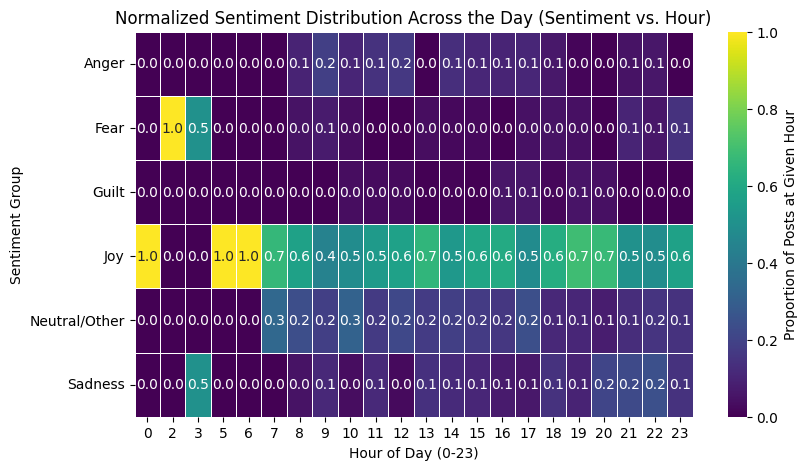

In [79]:
pivot_table = pd.crosstab(df_clean['Sentiment_Group'],df_clean['Hour'])

# b. Normalize by row (Hour) to show proportion of sentiment AT THAT HOUR
# The sum of sentiment proportions for any given hour will be 1.
normalized_pivot = pivot_table.div(pivot_table.sum(axis=0), axis=1)
# normalized_pivot = pivot_table.div(pivot_table.max(axis=1), axis=0)

# c. Plot the heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(
    normalized_pivot,
    cmap='viridis',
    annot=True,
    fmt=".1f",
    linewidths=.5,
    cbar_kws={'label': 'Proportion of Posts at Given Hour'}
)
plt.title('Normalized Sentiment Distribution Across the Day (Sentiment vs. Hour)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Sentiment Group')
plt.yticks(rotation=0)
plt.show()
#plt.savefig('sentiment_hour_heatmap.png')
#plt.close()
#print("Saved Heatmap to sentiment_hour_heatmap.png")

<Figure size 1200x700 with 0 Axes>

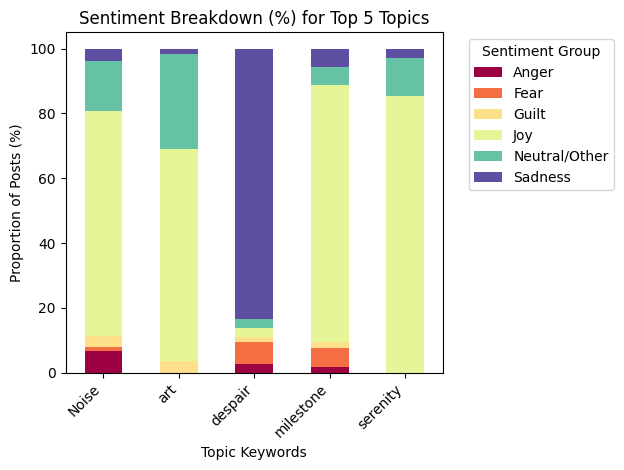

In [81]:
top_5_topics = df_clean['Topic_Keywords'].value_counts().nlargest(5).index
df_top_topics = df_clean[df_clean['Topic_Keywords'].isin(top_5_topics)]

# b. Create contingency table for Top 5 topics
topic_pivot = pd.crosstab(df_top_topics['Topic_Keywords'], df_top_topics['Sentiment_Group'])

# c. Normalize by row (Topic) to show sentiment breakdown WITHIN THAT TOPIC
# The sum of sentiment proportions for any given topic will be 1.
normalized_topic_pivot = topic_pivot.div(topic_pivot.sum(axis=1), axis=0) * 100 # * 100 for percentage

# d. Plot the stacked bar chart
plt.figure(figsize=(12, 7))
normalized_topic_pivot.plot(kind='bar', stacked=True, colormap='Spectral')
plt.title('Sentiment Breakdown (%) for Top 5 Topics')
plt.ylabel('Proportion of Posts (%)')
plt.xlabel('Topic Keywords')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# plt.savefig('sentiment_topic_stacked_bar.png')
# plt.close()
# print("Saved Stacked Bar Chart to sentiment_topic_stacked_bar.png")

<Figure size 1800x1200 with 0 Axes>

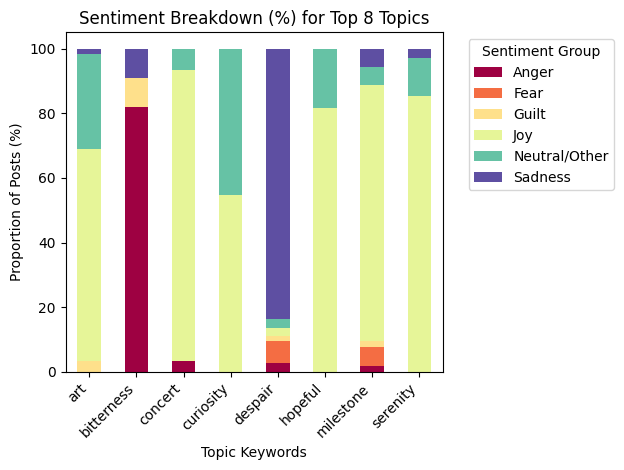

In [87]:
df_filtered = df_clean[df_clean['Topic_Keywords'] != 'Noise'].copy()

# a. Identify Top 5 Topics (based on post count) from the filtered data
top_5_topics = df_filtered['Topic_Keywords'].value_counts().nlargest(8).index
df_top_topics = df_filtered[df_filtered['Topic_Keywords'].isin(top_5_topics)]

# b. Create contingency table for Top 5 topics
topic_pivot = pd.crosstab(df_top_topics['Topic_Keywords'], df_top_topics['Sentiment_Group'])

# c. Normalize by row (Topic) to show sentiment breakdown WITHIN THAT TOPIC
normalized_topic_pivot = topic_pivot.div(topic_pivot.sum(axis=1), axis=0) * 100 # * 100 for percentage

# d. Plot the stacked bar chart
plt.figure(figsize=(18, 12))
normalized_topic_pivot.plot(kind='bar', stacked=True, colormap='Spectral')
plt.title('Sentiment Breakdown (%) for Top 8 Topics')
plt.ylabel('Proportion of Posts (%)')
plt.xlabel('Topic Keywords')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# plt.savefig('sentiment_topic_stacked_bar.png')
# plt.close()
# print("Saved Stacked Bar Chart to sentiment_topic_stacked_bar.png")

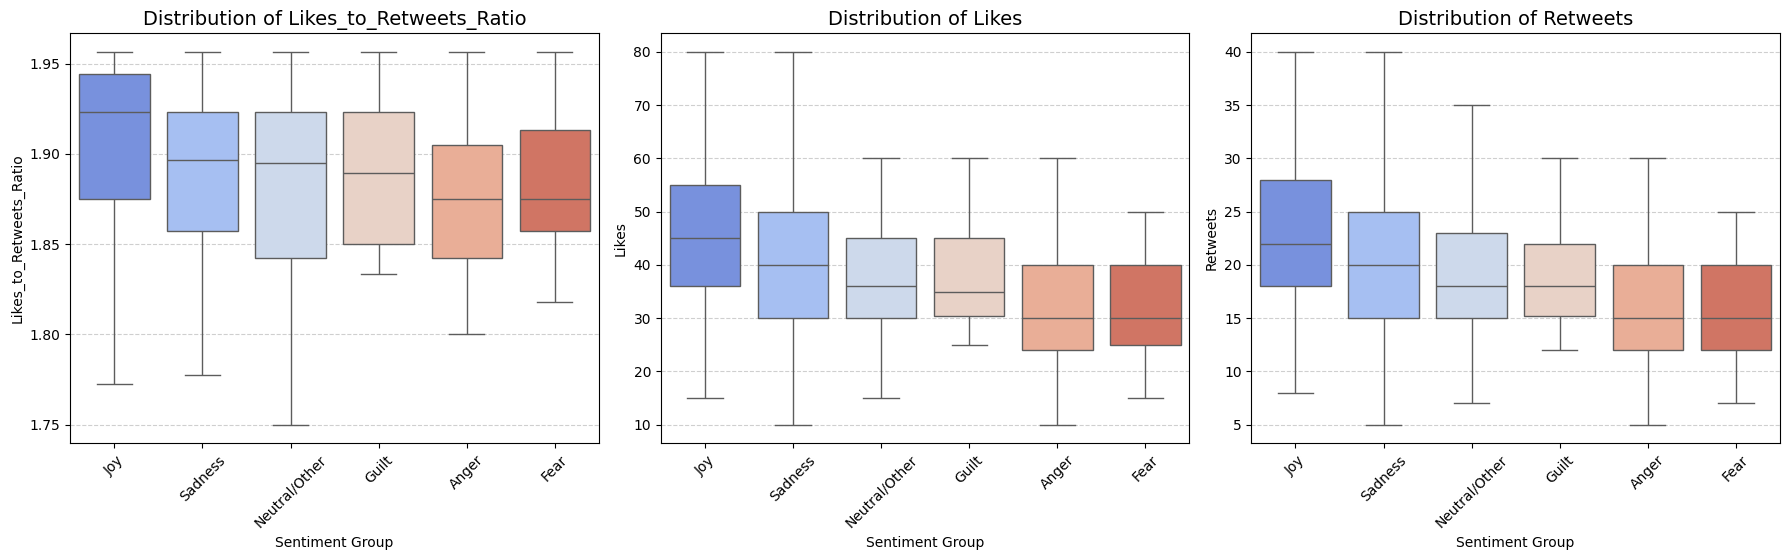

In [128]:
# Use the columns confirmed to be present/created
ENGAGEMENT_COLS = ['Likes_to_Retweets_Ratio', 'Likes', 'Retweets']
SENTIMENT_COLUMN = 'Sentiment_Group'
ANOVA_P_VALUE = 0.0000 # Use the value you obtained

median_likes_order = df_clean.groupby(SENTIMENT_COLUMN)['Likes'].median().sort_values(ascending=False).index

# 2. Generate 1x3 Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, col in enumerate(ENGAGEMENT_COLS):
    # Plotting Box Plot for each metric
    sns.boxplot(
        x=df_clean[SENTIMENT_COLUMN],
        y=df_clean[col],
        ax=axes[i],
        palette="coolwarm",
        order=median_likes_order,
        showfliers=False # Hide extreme outliers for cleaner visual of the central tendency
    )
    # sns.swarmplot(
    #     x=df_clean[SENTIMENT_COLUMN],
    #     y=df_clean[col],
    #     ax=axes[i],
    #     color='k',
    #     alpha=0.5,
    #     order=median_likes_order,
    #     size=3
    # )
    # sns.violinplot(
    #     x=df_clean[SENTIMENT_COLUMN],
    #     y=df_clean[col],
    #     ax=axes[i],
    #     palette="coolwarm",
    #     order=median_likes_order,
    #     inner=None, # Hide inner boxplot for clarity
    #     alpha=0.7
    # )
    
    # Customize plot
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Sentiment Group')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make room for suptitle
plt.show()
# plt.savefig('engagement_vs_sentiment_3_subplots_custom.png')
# plt.close()

# print("Box plots generated successfully: engagement_vs_sentiment_3_subplots_custom.png")

## ML modeling

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

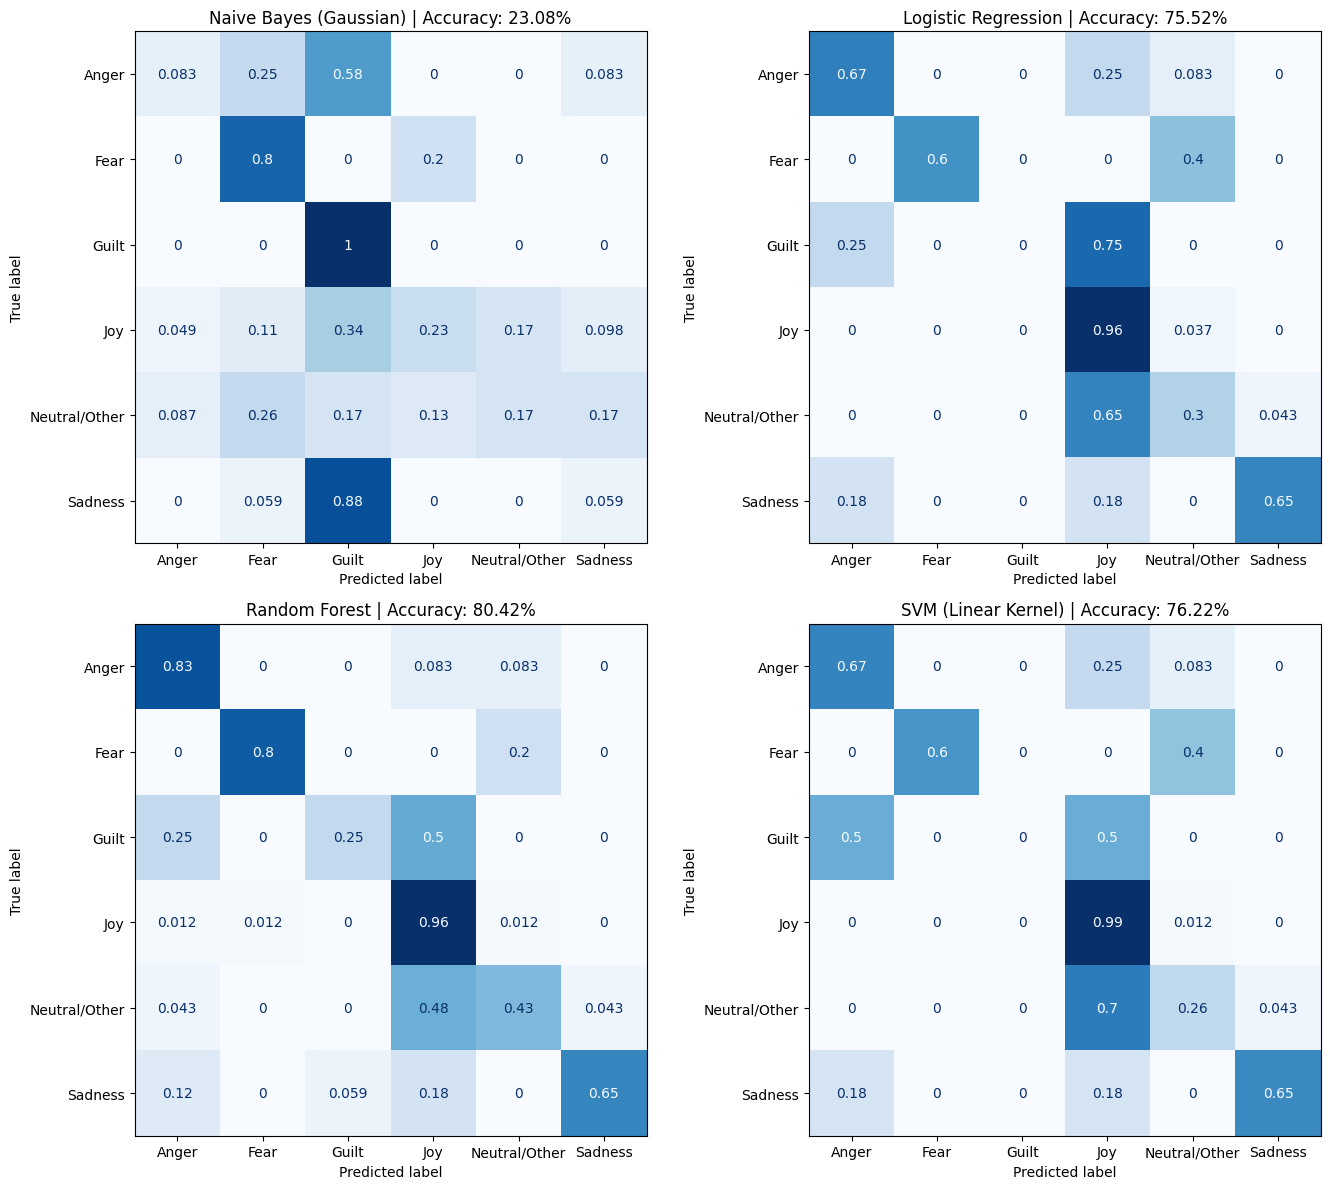


Accuracy Results (Test Set):
                    Model   Accuracy
2           Random Forest  80.419580
3     SVM (Linear Kernel)  76.223776
1     Logistic Regression  75.524476
0  Naive Bayes (Gaussian)  23.076923

Saved Confusion Matrices to confusion_matrices_baseline_models.png.
The Confusion Matrices are normalized to show proportion of true instances correctly/incorrectly classified.


In [147]:
# Define Features
NUMERICAL_FEATURES = ['Likes', 'Retweets', 'Likes_to_Retweets_Ratio']
CATEGORICAL_FEATURES = ['Hour', 'Topic_Keywords']
TARGET_COLUMN = 'Sentiment_Group'

# 2. Feature Engineering Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERICAL_FEATURES),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), CATEGORICAL_FEATURES)
    ],
    remainder='drop'
)

# 3. Model Training and Evaluation
X = df_clean[NUMERICAL_FEATURES + CATEGORICAL_FEATURES]
y = df_clean[TARGET_COLUMN]

# Train-Test Split (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define Models
models = {
    'Naive Bayes (Gaussian)': GaussianNB(),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM (Linear Kernel)': SVC(kernel='linear', random_state=42)
}

results = {}
pipelines = {}
# Create a figure for the 2x2 confusion matrix plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten() # Flatten the array for easy iteration

for idx, (name, model) in enumerate(models.items()):
    # Create and train the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    pipelines[name] = pipeline # Save pipeline
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy * 100 # Store as percentage for printing

    # --- Confusion Matrix Plotting ---
    ConfusionMatrixDisplay.from_estimator(
        pipeline,
        X_test,
        y_test,
        ax=axes[idx],
        cmap=plt.cm.Blues,
        normalize='true', # Plot normalized counts (proportions)
        colorbar=False
    )
    # Update title to include accuracy
    axes[idx].set_title(f'{name} | Accuracy: {accuracy:.2%}', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()
# plt.savefig('confusion_matrices_baseline_models.png')
# plt.close()

# Print Final Accuracy Results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\nAccuracy Results (Test Set):")
print(results_df.sort_values(by='Accuracy', ascending=False))

print("\nSaved Confusion Matrices to confusion_matrices_baseline_models.png.")
print("The Confusion Matrices are normalized to show proportion of true instances correctly/incorrectly classified.")

### Model interpretation

Training Logistic Regression Model...
Plotting Top 10 Features for 6 Classes...
Saved plots to feature_importance_2x3_grid.png


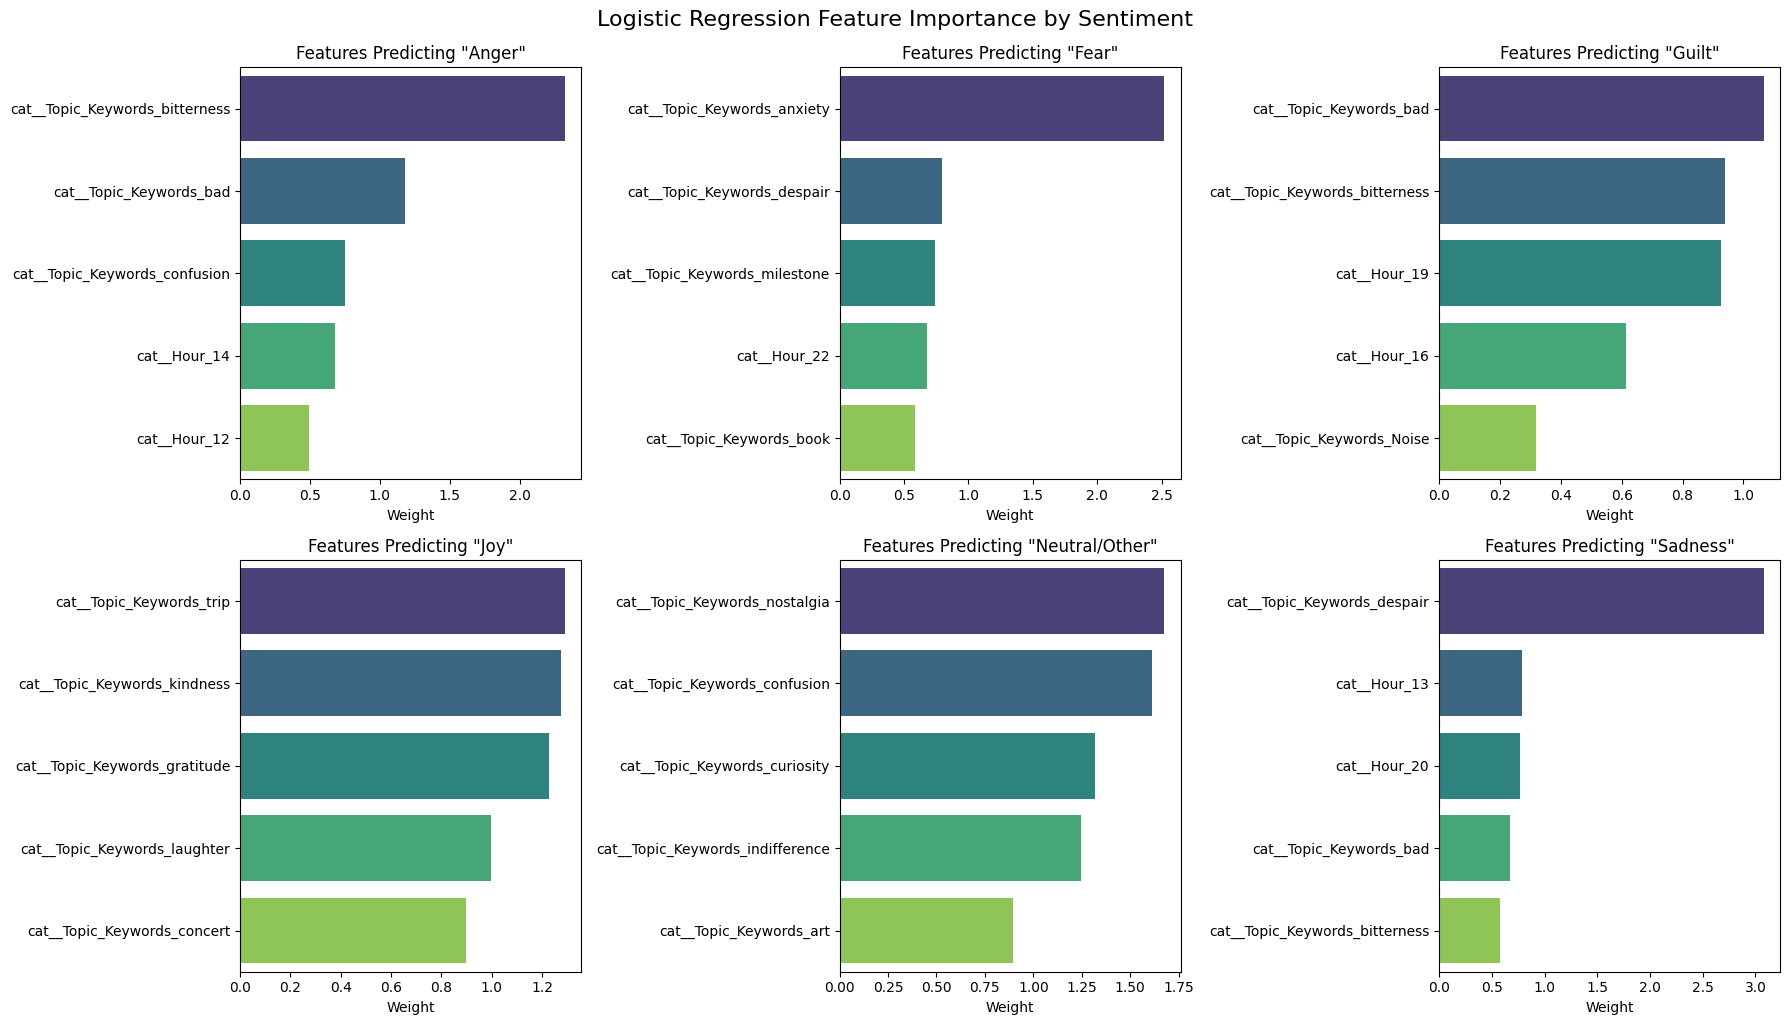

In [159]:
NUMERICAL_FEATURES = ['Likes', 'Retweets', 'Likes_to_Retweets_Ratio']
CATEGORICAL_FEATURES = ['Topic_Keywords', 'Hour']

# --- 2. Train the Winner (Logistic Regression) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERICAL_FEATURES),
        ('cat', OneHotEncoder(handle_unknown='ignore'), CATEGORICAL_FEATURES)
    ],
    remainder='drop'
)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model =  SVC(kernel='linear', random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

X = df_clean[NUMERICAL_FEATURES + CATEGORICAL_FEATURES]
y = df_clean[TARGET_COLUMN]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Logistic Regression Model...")
pipeline.fit(X_train, y_train)

# --- 3. Extract Weights and Feature Names ---
# Get feature names from the preprocessor (handles OneHotEncoding naming)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get coefficients (weights) from the model
# Shape: (n_classes, n_features)
coeffs = pipeline.named_steps['classifier'].coef_
classes = pipeline.named_steps['classifier'].classes_

# --- 4. Plot Top Predictors for Each Sentiment ---

print(f"Plotting Top 10 Features for {n_classes} Classes...")

# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) # Adjusted figsize for 2x3
axes_flat = axes.flatten() # Flatten 2D array to 1D for easy iteration

for i, ax in enumerate(axes_flat):
    if i < n_classes:
        class_label = classes[i]
        class_coeffs = coeffs[i]
        feat_importances = pd.Series(class_coeffs, index=feature_names)
        
        # Get Top 10 Positive Predictors
        top_10 = feat_importances.sort_values(ascending=False).head(5)
        
        # Plot on the specific subplot 'ax'
        sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette='viridis')
        ax.set_title(f'Features Predicting "{class_label}"', fontsize=12)
        ax.set_xlabel('Weight')
        ax.set_ylabel('') # Remove label to save space, feature names are enough
    else:
        # Hide unused subplots if you have fewer than 6 classes
        ax.set_visible(False)

plt.tight_layout()
plt.suptitle('Logistic Regression Feature Importance by Sentiment', fontsize=16, y=1.02)
plt.savefig('feature_importance_2x3_grid.png')
print("Saved plots to feature_importance_2x3_grid.png")

Plot saved to random_forest_global_importance.png


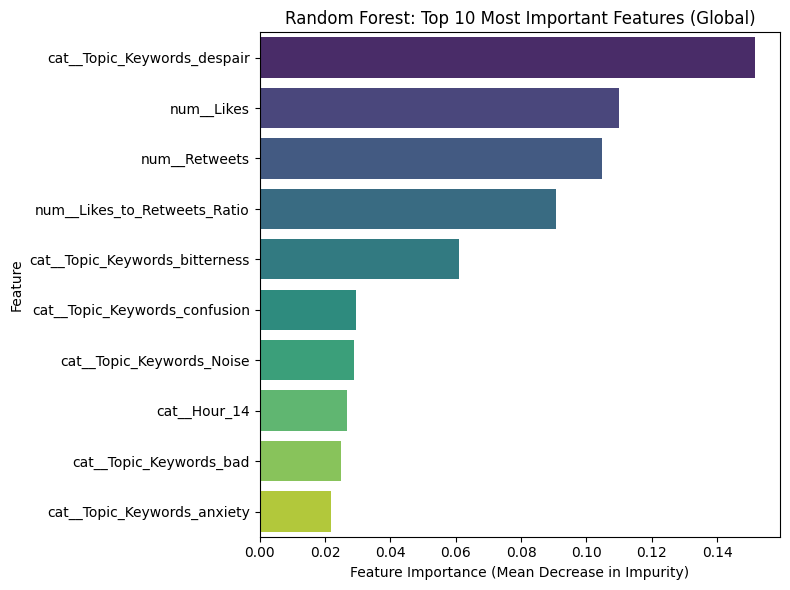

In [161]:
# --- 2. Train Random Forest ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERICAL_FEATURES),
        ('cat', OneHotEncoder(handle_unknown='ignore'), CATEGORICAL_FEATURES)
    ],
    remainder='drop'
)

# Initialize Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

# Train
pipeline.fit(X_train, y_train)

# --- 3. Extract & Plot Global Importance ---
# Get feature names from the preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
# Get importances
importances = pipeline.named_steps['classifier'].feature_importances_

# Create DataFrame & Sort
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Random Forest: Top 10 Most Important Features (Global)')
plt.xlabel('Feature Importance (Mean Decrease in Impurity)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('random_forest_global_importance.png')
print("Plot saved to random_forest_global_importance.png")

Training Linear SVM Model...
Plotting Top 10 Features for 6 Classes in a 2x3 Grid...


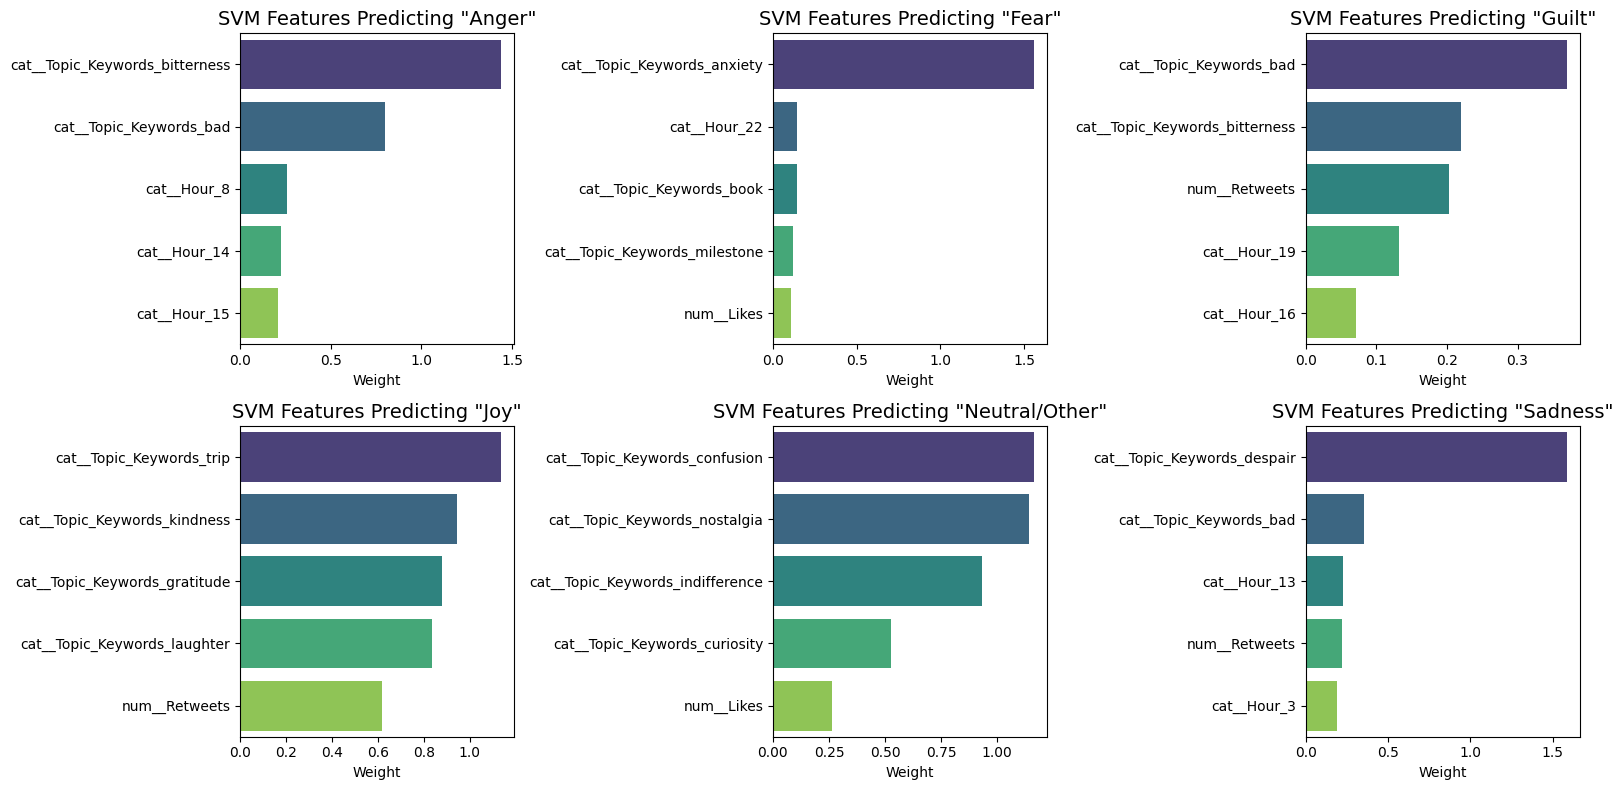

Plot saved to svm_feature_importance_2x3_grid.png


<Figure size 640x480 with 0 Axes>

In [176]:
from sklearn.svm import LinearSVC

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERICAL_FEATURES),
        ('cat', OneHotEncoder(handle_unknown='ignore'), CATEGORICAL_FEATURES)
    ],
    remainder='drop'
)

# Use LinearSVC for clear One-vs-Rest interpretation
model = LinearSVC(random_state=42, max_iter=2000, dual=False)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

X = df_clean[NUMERICAL_FEATURES + CATEGORICAL_FEATURES]
y = df_clean[TARGET_COLUMN]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Linear SVM Model...")
pipeline.fit(X_train, y_train)

# --- 3. Extract Weights ---
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
coeffs = pipeline.named_steps['classifier'].coef_
classes = pipeline.named_steps['classifier'].classes_

# --- 4. Plot 2x3 Grid ---
n_classes = len(classes)
print(f"Plotting Top 10 Features for {n_classes} Classes in a 2x3 Grid...")

fig, axes = plt.subplots(2, 3, figsize=(16,8)) 
axes_flat = axes.flatten()

for i, ax in enumerate(axes_flat):
    if i < n_classes:
        class_label = classes[i]
        class_coeffs = coeffs[i]
        feat_importances = pd.Series(class_coeffs, index=feature_names)
        
        # Get Top 10 Positive Predictors
        top_10 = feat_importances.sort_values(ascending=False).head(5)
        
        # Plot
        sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette='viridis')
        ax.set_title(f'SVM Features Predicting "{class_label}"', fontsize=14)
        ax.set_xlabel('Weight')
        ax.set_ylabel('')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()
plt.suptitle('SVM Feature Importance by Sentiment', fontsize=20, y=1.02)
plt.savefig('svm_feature_importance_2x3_grid.png')
print("Plot saved to svm_feature_importance_2x3_grid.png")

Loading Model...
Encoding Data... (This may take a moment)
Accuracy: 62.03%


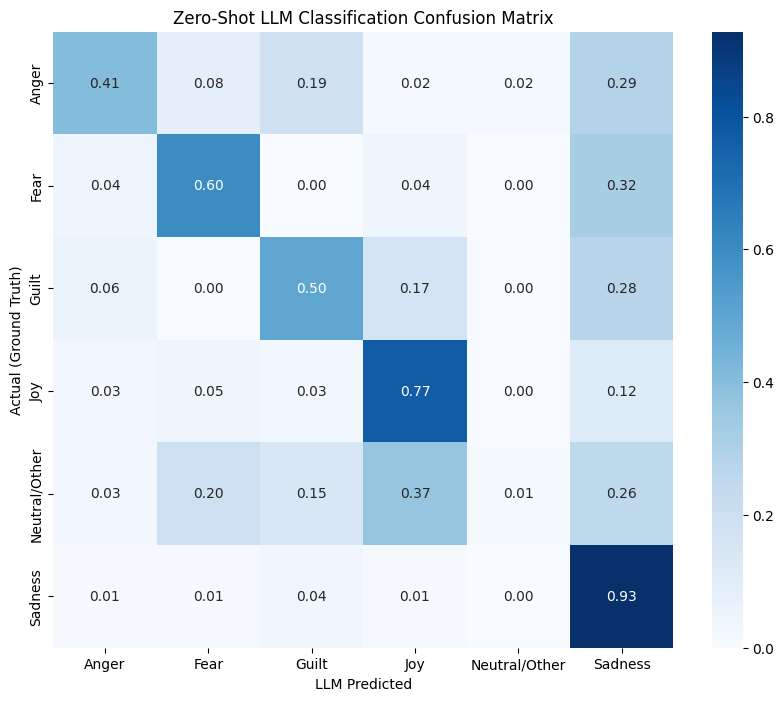

In [185]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.manifold import TSNE

print("Loading Model...")
model = SentenceTransformer('all-mpnet-base-v2')#'all-MiniLM-L6-v2')

# Define the Labels you want to predict
candidate_labels = ["Anger", "Fear", "Guilt", "Joy", "Neutral/Other", "Sadness"]

print("Encoding Data... (This may take a moment)")

# ---------------------------------------------------------
# 2. GENERATE EMBEDDINGS (The "LLM" Part)
# ---------------------------------------------------------
# Encode the social media posts
corpus_embeddings = model.encode(df_clean['Text'].tolist(), convert_to_tensor=True)

# Encode the labels (We compare posts to these words)
label_embeddings = model.encode(candidate_labels, convert_to_tensor=True)

# ---------------------------------------------------------
# 3. PREDICT SENTIMENT (Cosine Similarity)
# ---------------------------------------------------------
# Compute cosine similarity between every post and every label
cosine_scores = util.cos_sim(corpus_embeddings, label_embeddings)

# Find the label with the highest score for each post
predicted_indices = np.argmax(cosine_scores.cpu().numpy(), axis=1)
predicted_labels = [candidate_labels[idx] for idx in predicted_indices]

# Add predictions to dataframe
df_clean['LLM_Predicted_Sentiment'] = predicted_labels

# Standardize casing for comparison (Ground Truth vs Prediction)
y_true = df_clean['Sentiment_Group'].str.title() # Adjust column name if needed
y_pred = [label.title() for label in predicted_labels]

# ---------------------------------------------------------
# 4. VISUALIZATION 1: CONFUSION MATRIX (For Slide 16/17)
# ---------------------------------------------------------
print(f"Accuracy: {accuracy_score(y_true, y_pred):.2%}")

cm = confusion_matrix(y_true, y_pred, labels=[l.title() for l in candidate_labels], normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=candidate_labels, yticklabels=candidate_labels)
plt.xlabel('LLM Predicted')
plt.ylabel('Actual (Ground Truth)')
plt.title('Zero-Shot LLM Classification Confusion Matrix')
plt.savefig('confusion_matrix_llm.png')
plt.show()

Generating t-SNE Visualization...


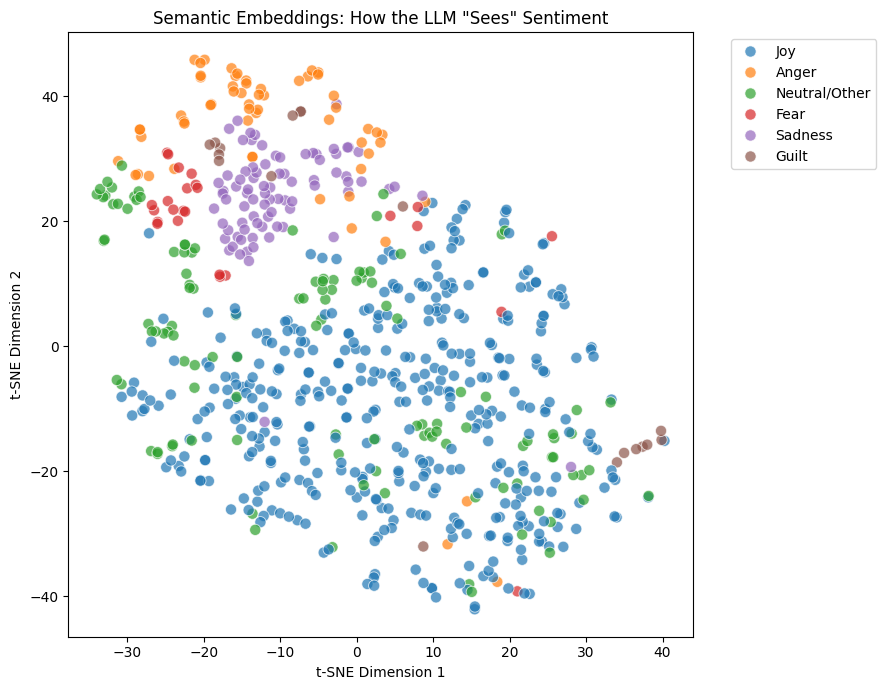

Done! Images saved as 'confusion_matrix_llm.png' and 'tsne_embeddings.png'


In [189]:
# ---------------------------------------------------------
# 5. VISUALIZATION 2: t-SNE CLUSTERS
# ---------------------------------------------------------
print("Generating t-SNE Visualization...")

# Reduce dimensions from 384 to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca', learning_rate='auto')
vis_dims = tsne.fit_transform(corpus_embeddings.cpu().numpy())

# Create a clean dataframe for plotting
vis_df = pd.DataFrame({
    'x': vis_dims[:, 0],
    'y': vis_dims[:, 1],
    'Sentiment': df_clean['Sentiment_Group'] # Color by ACTUAL sentiment to show clustering
})

plt.figure(figsize=(9, 7))
sns.scatterplot(data=vis_df, x='x', y='y', hue='Sentiment', palette='tab10', alpha=0.7, s=65)
plt.title('Semantic Embeddings: How the LLM "Sees" Sentiment')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('tsne_embeddings.png')
plt.show()

print("Done! Images saved as 'confusion_matrix_llm.png' and 'tsne_embeddings.png'")

## Generalization of the model

In [143]:
df_test = load_data('../Data/sentiment_analysis_test.csv')
df_test.rename(columns={'sentiment': 'Sentiment'}, inplace=True)
df_test = clean_data(df_test)

Dataset loaded successfully with shape: (499, 7)
Starting data cleaning pipeline...
Cleaned 'Platform' column - unique values: 3
Cleaned 'Sentiment' column - unique values: 3
Found and removed 105 duplicate rows.
New shape: (394, 7)

=== Missing Values ===
Year             0
Month            0
Day              0
Time of Tweet    0
text             0
Sentiment        0
Platform         0
dtype: int64

=== Duplicates ===
Found 0 duplicate rows.

=== Sentiment Mapping Results ===
Sentiment_Group
Neutral/Other    153
Joy              132
Anger            109
Name: count, dtype: int64

=== Cleaning Complete ===
Final shape: (394, 9)


In [144]:
# Check data validity
print(df_test.describe())
print(df_test.sample(5))

              Year       Month         Day
count   394.000000  394.000000  394.000000
mean   2020.469543    6.083756   15.616751
std       2.863357    3.622883    8.714752
min    2010.000000    1.000000    1.000000
25%    2019.000000    3.000000    8.000000
50%    2021.000000    6.000000   15.000000
75%    2023.000000    9.000000   22.000000
max    2023.000000   12.000000   31.000000
     Year  Month  Day Time of Tweet  \
462  2017     11    5       morning   
449  2015      7   12         night   
180  2023      8    4          noon   
262  2023      9    7          noon   
127  2022      6   20         night   

                                                  text Sentiment   Platform  \
462         but you always have lee. Let`s go to Paris   neutral   Facebook   
449  Is heading home from foot surgery and wishing ...  positive    Twitter   
180   Happy birthday! Just woke up on this side of ...  positive    Twitter   
262   it was only once for my big brother...and I`m...   neutr